# AN ANALYSIS OF THE TOP 30 MOST POPULAR ANIME

## DATA COLLECTION

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='Anime.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],...,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],...,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],...,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],...,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],...,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."


In [2]:
df_data_1.columns

Index(['animeID', ' name', ' title_english', ' title_japanese',
       ' title_synonyms', ' type', ' source', ' producers', ' genre',
       ' studio', ' episodes', ' status', ' airing', ' aired', ' duration',
       ' rating', ' score', ' scored_by', ' rank', ' popularity', ' members',
       ' favorites', ' synopsis', ' background', ' premiered', ' broadcast',
       ' related'],
      dtype='object')

In [3]:
df_anime = df_data_1[[' name', ' type', ' episodes', ' score', ' rank', ' popularity']]

In [4]:
df_anime.head()

,name,type,episodes,score,rank,popularity
0,Cowboy Bebop,TV,26.0,8.81,26.0,39.0
1,Cowboy Bebop: Tengoku no Tobira,Movie,1.0,8.41,164.0,449.0
2,Trigun,TV,26.0,8.30,255.0,146.0
3,Witch Hunter Robin,TV,26.0,7.33,2371.0,1171.0
4,Bouken Ou Beet,TV,52.0,7.03,3544.0,3704.0


In [5]:
df_anime = df_anime.rename(columns = {" name" : "name", " type" : "type", " episodes" : "episodes", " rank" : "rank", " popularity": "popularity", " score": "score"})

In [6]:
df_anime.columns

Index(['name', 'type', 'episodes', 'score', 'rank', 'popularity'], dtype='object')

## DATA ANALYSIS

In [7]:
## Importing Data Visualization packages
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

In [8]:
df_anime = df_anime[df_anime['type'] == 'TV']

In [9]:
df_anime.shape

(4402, 6)

In [10]:
df_anime.head()

,name,type,episodes,score,rank,popularity
0,Cowboy Bebop,TV,26.0,8.81,26.0,39.0
2,Trigun,TV,26.0,8.30,255.0,146.0
3,Witch Hunter Robin,TV,26.0,7.33,2371.0,1171.0
4,Bouken Ou Beet,TV,52.0,7.03,3544.0,3704.0
5,Hachimitsu to Clover,TV,24.0,8.12,419.0,536.0


In [11]:
df_anime.corr()

,episodes,score,rank,popularity
episodes,1.000000,-0.030030,0.056884,0.138464
score,-0.030030,1.000000,-0.853322,-0.678258
rank,0.056884,-0.853322,1.000000,0.822535
popularity,0.138464,-0.678258,0.822535,1.000000


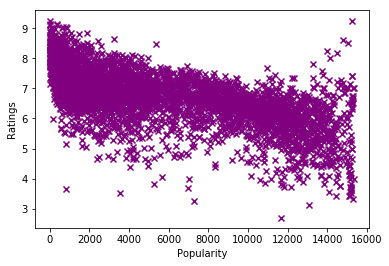

In [12]:
## A scatter plot comparing popularity to the ratings of anime 
plt.scatter('popularity','score', data = df_anime, marker = 'x', color = 'purple')
plt.ylabel("Ratings")
plt.xlabel("Popularity")
plt.show()

In [13]:
df_anime1 = df_anime

In [14]:
df_anime1.head()

,name,type,episodes,score,rank,popularity
0,Cowboy Bebop,TV,26.0,8.81,26.0,39.0
2,Trigun,TV,26.0,8.30,255.0,146.0
3,Witch Hunter Robin,TV,26.0,7.33,2371.0,1171.0
4,Bouken Ou Beet,TV,52.0,7.03,3544.0,3704.0
5,Hachimitsu to Clover,TV,24.0,8.12,419.0,536.0


In [15]:
df_anime1[['score', 'rank', 'popularity']] = df_anime1[['score', 'rank', 'popularity']].convert_objects(convert_numeric = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [16]:
df_anime11 = df_anime1.sort_values(by = "popularity", ascending = True).reset_index()
df_anime11 = df_anime11[df_anime11['popularity'] != 0.0].reset_index()
df_anime11 = df_anime11.head(30)

In [17]:
df_anime11

,level_0,index,name,type,episodes,score,rank,popularity
0,7,1311,Death Note,TV,37.0,8.66,54.0,1.0
1,8,7233,Shingeki no Kyojin,TV,25.0,8.48,116.0,2.0
2,9,6396,Sword Art Online,TV,25.0,7.58,1440.0,3.0
3,10,3769,Fullmetal Alchemist: Brotherhood,TV,64.0,9.24,1.0,4.0
4,11,10238,One Punch Man,TV,12.0,8.71,46.0,5.0
5,12,8429,Tokyo Ghoul,TV,12.0,7.98,594.0,6.0
6,13,5470,Steins;Gate,TV,24.0,9.14,3.0,7.0
7,14,4433,Angel Beats!,TV,13.0,8.29,256.0,8.0
8,15,7931,No Game No Life,TV,12.0,8.38,188.0,9.0
9,16,9,Naruto,TV,220.0,7.90,705.0,10.0


In [18]:
df_anime12 = df_anime11[['name', 'type', 'episodes', 'score', 'rank', 'popularity']]

In [19]:
df_anime12

,name,type,episodes,score,rank,popularity
0,Death Note,TV,37.0,8.66,54.0,1.0
1,Shingeki no Kyojin,TV,25.0,8.48,116.0,2.0
2,Sword Art Online,TV,25.0,7.58,1440.0,3.0
3,Fullmetal Alchemist: Brotherhood,TV,64.0,9.24,1.0,4.0
4,One Punch Man,TV,12.0,8.71,46.0,5.0
5,Tokyo Ghoul,TV,12.0,7.98,594.0,6.0
6,Steins;Gate,TV,24.0,9.14,3.0,7.0
7,Angel Beats!,TV,13.0,8.29,256.0,8.0
8,No Game No Life,TV,12.0,8.38,188.0,9.0
9,Naruto,TV,220.0,7.90,705.0,10.0


In [20]:
df_anime12.corr()

,episodes,score,rank,popularity
episodes,1.000000,-0.068555,-0.024927,0.192953
score,-0.068555,1.000000,-0.836566,-0.131229
rank,-0.024927,-0.836566,1.000000,0.063452
popularity,0.192953,-0.131229,0.063452,1.000000


In [21]:
df_anime13 = df_anime12[['name', 'episodes']].sort_values(by = "episodes", ascending = True)

In [22]:
ind = df_anime13.set_index("name", inplace = True)

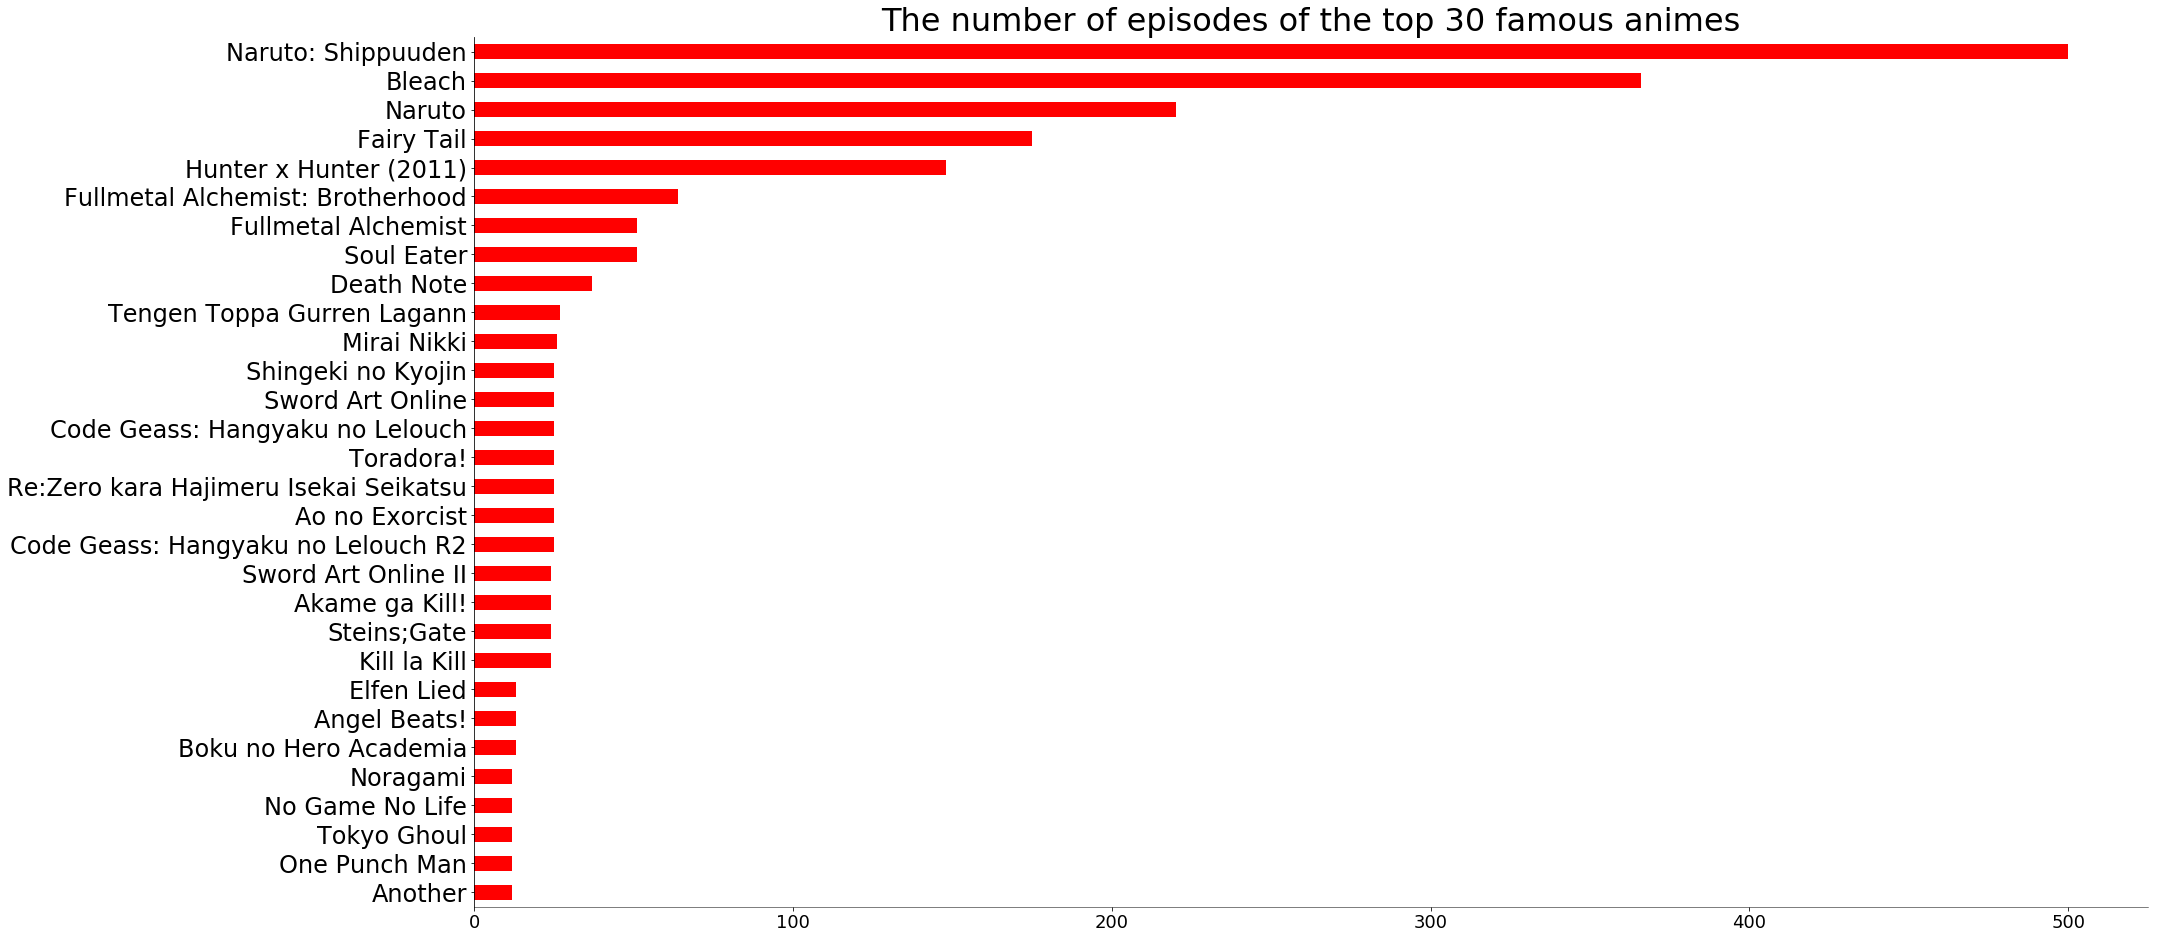

In [23]:
## A horizontal bar graph showing the top 30 popular animes as well as their number of episodes
bar = df_anime13.plot(kind='barh',figsize=(30, 16), color = "red", legend = None)
bar
plt.yticks(fontsize = 24)
plt.xticks(ind,fontsize = 18)
plt.ylabel("")
plt.title("The number of episodes of the top 30 famous animes", fontsize=32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

In [24]:
df_anime14 = df_anime12[['name', 'score']].sort_values(by = "score", ascending = True)

In [25]:
ind2 = df_anime14.set_index('name', inplace = True)

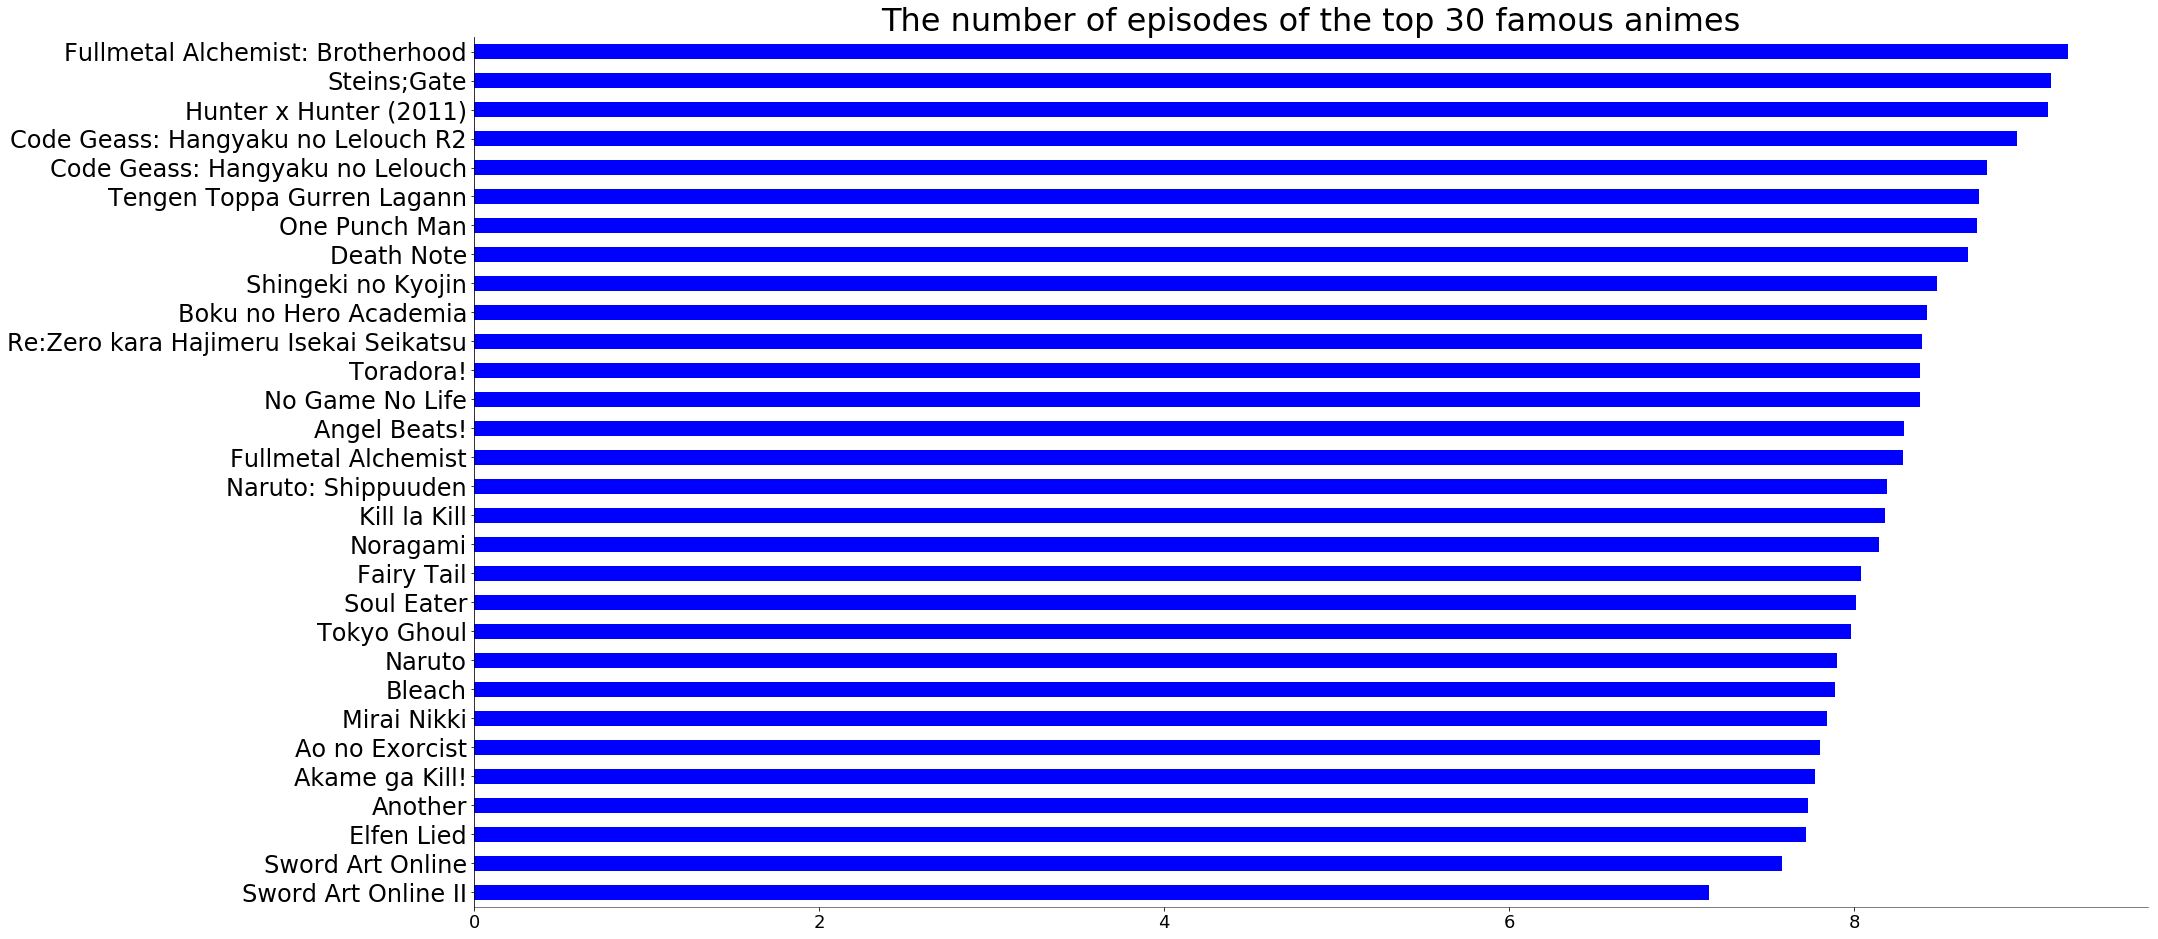

In [26]:
## A horizontal bar graph showing the top 30 popular animes as well as their ratings
bar = df_anime14.plot(kind='barh',figsize=(30, 16), color = "blue", legend = None)
bar
plt.yticks(fontsize = 24)
plt.xticks(ind2,fontsize = 18)
plt.ylabel("")
plt.title("The ratings of the top 30 famous animes", fontsize=32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()